# Systemy inspekcji wizualnej  
## Laboratorium  3 
Temat: Podstawowe operacje na obrazach

Instrukcję opracował: dr inż. Łukasz Jeleń  
  
Wrocław 2022

---

Nazwisko i Imię: Jakub Grelowski  
Nr albumu: 262754  
data wykonania ćwiczenia: 29.10.2024  

---

# 1. Narzędzia

Na zjęciach korzystamy z pythnona, a jako środowisko pracy mają Państwo do wyboru Google Colab (https://colab.research.google.com) - wersja online, lub Anaconda Navigator (https://www.anaconda.com/) - wymaga instalacji na własnym komputerze. Są to oczywiście tylko propozycje. 

# 2. Zadania

## Zadanie 1 - wczytywanie, wyznaczanie histogramów

Dla 2 obrazów dostępnych na e-portalu:

### a) Histogramy w odcieniach szarości 
  
Wyznacz histogram odcieni szarości (należy zamienić obraz np.: za pomoca `COLOR_BGR2GRAY`) wczytywanych

(array([6.000e+00, 1.040e+02, 4.770e+02, 1.424e+03, 2.354e+03, 2.517e+03,
        2.291e+03, 1.975e+03, 1.732e+03, 1.385e+03, 1.219e+03, 1.027e+03,
        9.460e+02, 8.490e+02, 7.430e+02, 7.170e+02, 6.560e+02, 6.460e+02,
        6.360e+02, 5.660e+02, 5.630e+02, 5.840e+02, 5.990e+02, 6.080e+02,
        5.920e+02, 6.530e+02, 6.820e+02, 7.380e+02, 8.670e+02, 8.460e+02,
        8.770e+02, 9.200e+02, 9.390e+02, 8.820e+02, 8.440e+02, 8.900e+02,
        8.570e+02, 8.790e+02, 8.970e+02, 9.140e+02, 8.850e+02, 9.700e+02,
        9.150e+02, 9.510e+02, 9.460e+02, 1.078e+03, 1.086e+03, 1.162e+03,
        1.365e+03, 1.405e+03, 1.499e+03, 1.665e+03, 1.713e+03, 1.861e+03,
        1.936e+03, 1.914e+03, 2.093e+03, 2.173e+03, 2.305e+03, 2.310e+03,
        2.432e+03, 2.581e+03, 2.685e+03, 2.951e+03, 2.891e+03, 2.988e+03,
        2.860e+03, 2.811e+03, 2.612e+03, 2.424e+03, 2.086e+03, 1.833e+03,
        1.600e+03, 1.413e+03, 1.278e+03, 1.095e+03, 1.015e+03, 1.061e+03,
        9.350e+02, 9.150e+02, 9.310e+0

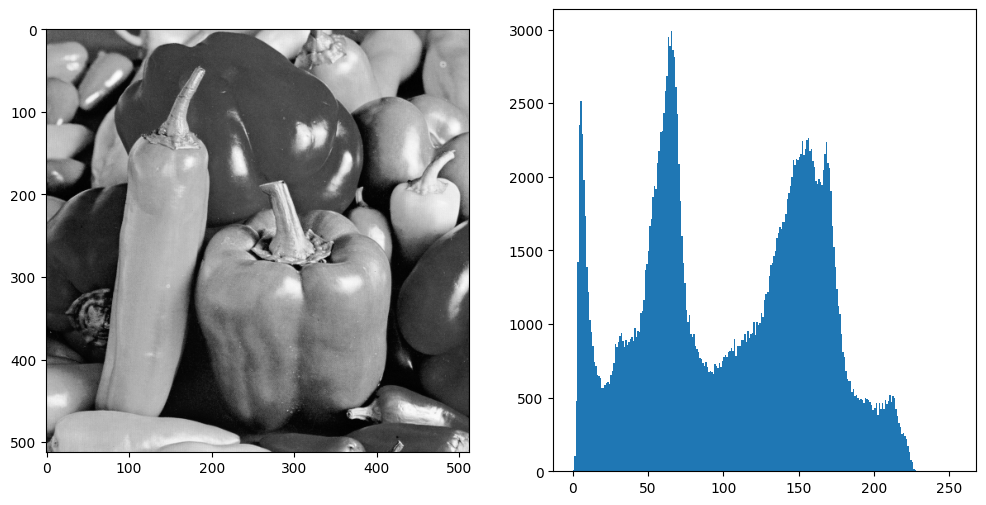

In [1]:
import matplotlib.pyplot as plt
import cv2 as cv

image = cv.imread("Lab2zdjecia/PeppersRGB.tif", cv.IMREAD_UNCHANGED)

image_gray = cv.cvtColor(image, cv.COLOR_RGB2GRAY)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.imshow(image_gray, cmap='gray')
plt.subplot(1,2,2)
plt.hist(image_gray.ravel(), 255, range=[0,255])

### b) Histogramy obrazu kolorowego  
  
Wyznacz histogram kolorowy wczytywanych obrazów

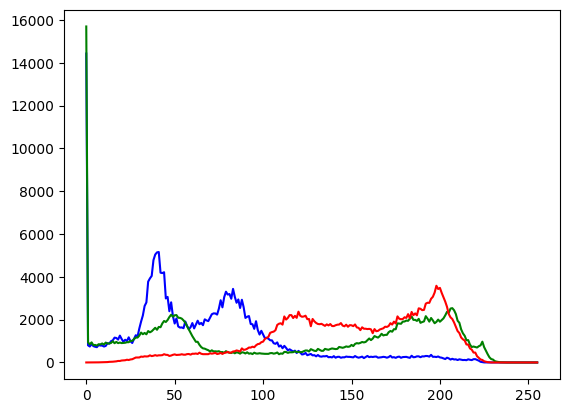

In [2]:
color = ('b','g','r')
for i,col in enumerate(color):
    hist = cv.calcHist([image],[i],None,[256],[0,256])
    plt.plot(hist,color = col)

## Zadanie 2 - operacje podstawowe na obrazach  
  
Dla 2 obrazów dostępnych na e-portalu:

### a) Suma obrazów  
  
Po wczytaniu i zamianie 2 obrazów kolorowych na obrazy monochromatyczne wyznacz ich sumę jako $y_{ij} = Normalize[f_{ij} + g_{ij}]$. Przeprowadź noramalizację na dwa sposoby:  
- Poprzez obcięcie wartości powyżej 255 do 255  
  
- Poprzez: $y_{ij} = \frac{f_{ij}}{2} + \frac{g_{ij}}{2}$  
  
Zaobserwowane różnice opis we wnioskach do Laboratorium

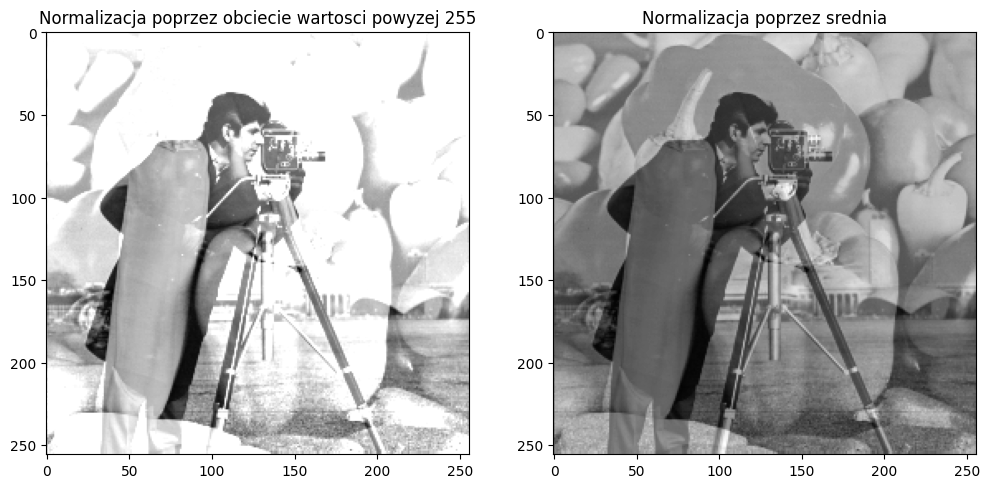

In [3]:
import numpy as np
image = cv.imread("Lab2zdjecia/PeppersRGB.tif", cv.IMREAD_UNCHANGED)
image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
image2 = cv.imread("Lab2zdjecia/Cameraman.tif", cv.IMREAD_UNCHANGED)
image2 = cv.cvtColor(image2, cv.COLOR_BGR2GRAY)
image = cv.resize(image, dsize=(image2.shape[0], image2.shape[1]))

clip = np.clip(cv.add(image, image2, cv.CV_8U), 0, 255) 
mean = cv.add(image // 2, image2 //2)

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title('Normalizacja poprzez obciecie wartosci powyzej 255')
plt.imshow(clip, cmap='gray')

plt.subplot(1,2,2)
plt.title('Normalizacja poprzez srednia')
plt.imshow(mean, cmap='gray')

### b) Różnica obrazów  
  
Po wczytaniu i zamianie 2 obrazów kolorowych na obrazy monochromatyczne wyznacz ich różnicę jako $y_{ij} = Normalize[f_{ij} - g_{ij}]$.  
  
- Dokonaj normalizacji do przedziału `[0,255]` przez obcinanie poniżej 0 do 0  
- Wyznacz różnicę bezwzględną: $y_{ij} = abs(f_{ij} - g_{ij})$  
  
Zaobserwowane różnice opis we wnioskach do Laboratorium

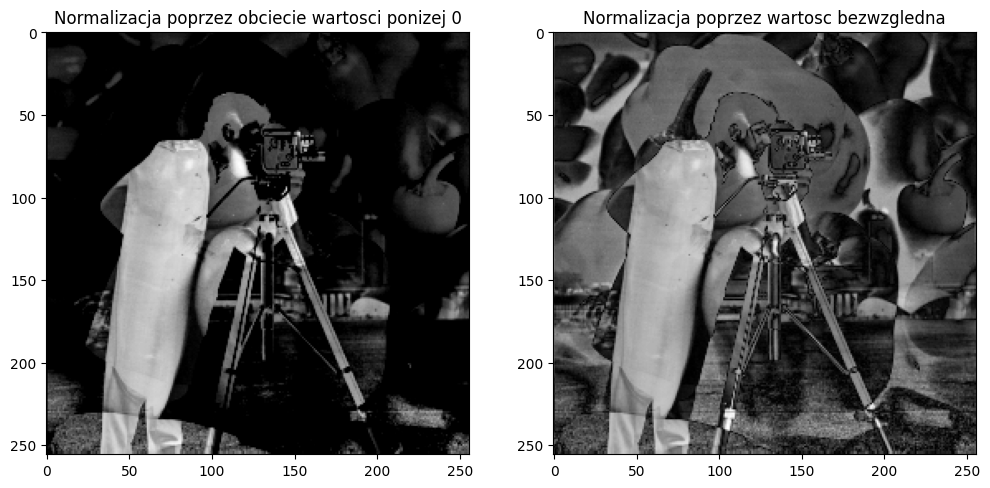

In [4]:
clip = np.clip(cv.subtract(image, image2, cv.CV_8U), 0, 255)
abs = cv.absdiff(image, image2)

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title('Normalizacja poprzez obciecie wartosci ponizej 0')
plt.imshow(clip, cmap='gray')

plt.subplot(1,2,2)
plt.title('Normalizacja poprzez wartosc bezwzgledna')
plt.imshow(abs, cmap='gray')

### c) Maksimum i minimum  
  
Po wczytaniu i zamianie 2 obrazów kolorowych na obrazy monochromatyczne wyznacz: 
  
- Maksimum z dwóch obrazów przez $y_{ij} = Max(f_{ij}, g_{ij})$
- Minimum z dwóch obrazów przez $y_{ij} = Min(f_{ij}, g_{ij})$  
  
Zaobserwowane różnice opis we wnioskach do Laboratorium

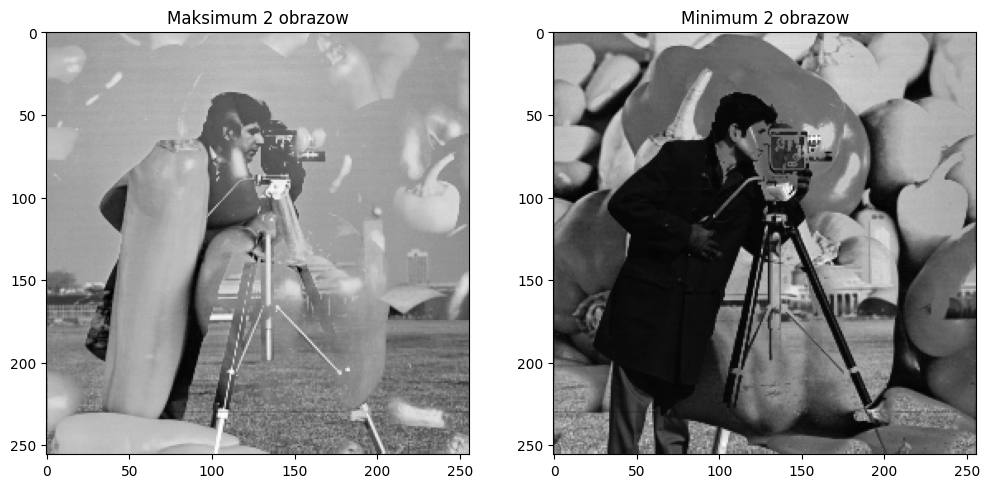

In [5]:
max = cv.max(image, image2)
min = cv.min(image, image2)

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title('Maksimum 2 obrazow')
plt.imshow(max, cmap='gray')

plt.subplot(1,2,2)
plt.title('Minimum 2 obrazow')
plt.imshow(min, cmap='gray')

### d) Operacje logiczne  
  
Po wczytaniu 2 obrazów kolorowych wykonaj:  
  
- zamień obrazy na obrazy monochromatyczne i wykonaj operacje `OR`, `XOR` i `AND` 
- zamień obrazy na obrazy binarne i wykonaj operacje `OR`, `XOR` i `AND` 
  
Podsumuj obsewrwacje we wnioskach do Laboratorium

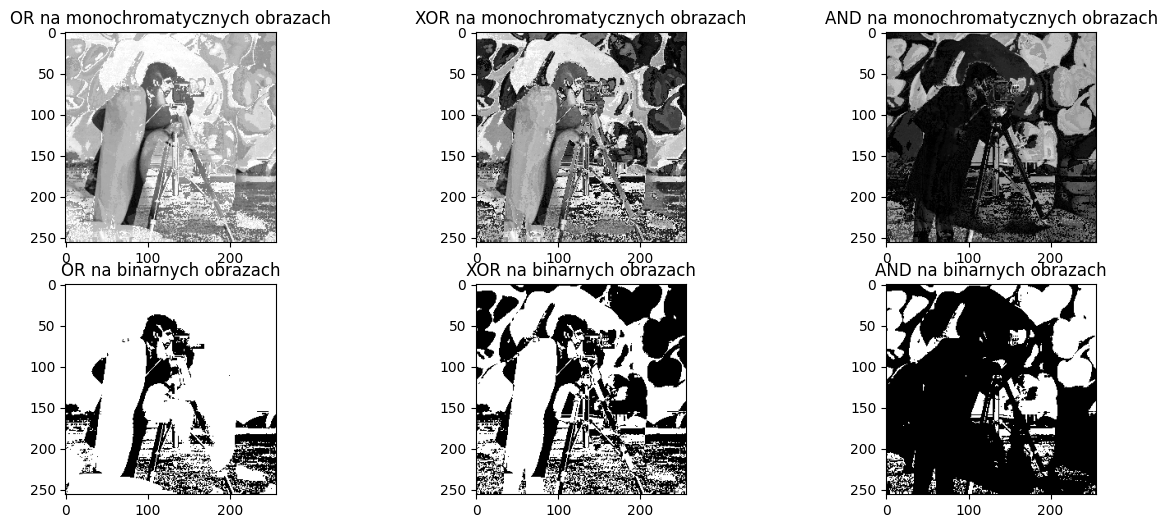

In [6]:
mon_or = cv.bitwise_or(image, image2)
mon_xor = cv.bitwise_xor(image, image2)
mon_and = cv.bitwise_and(image, image2)

_, binary_image = cv.threshold(image, 127, 255, cv.THRESH_BINARY)
_, binary_image2 = cv.threshold(image2, 127, 255, cv.THRESH_BINARY)

bin_or = cv.bitwise_or(binary_image, binary_image2)
bin_xor = cv.bitwise_xor(binary_image, binary_image2)
bin_and = cv.bitwise_and(binary_image, binary_image2)

plt.figure(figsize=(15, 6))

plt.subplot(2,3,1)
plt.title('OR na monochromatycznych obrazach')
plt.imshow(mon_or, cmap='gray')
plt.subplot(2,3,2)
plt.title('XOR na monochromatycznych obrazach')
plt.imshow(mon_xor, cmap='gray')
plt.subplot(2,3,3)
plt.title('AND na monochromatycznych obrazach')
plt.imshow(mon_and, cmap='gray')
plt.subplot(2,3,4)
plt.title('OR na binarnych obrazach')
plt.imshow(bin_or, cmap='gray')
plt.subplot(2,3,5)
plt.title('XOR na binarnych obrazach')
plt.imshow(bin_xor, cmap='gray')
plt.subplot(2,3,6)
plt.title('AND na binarnych obrazach')
plt.imshow(bin_and, cmap='gray')

## Zadanie 3 - Operacje podstawowe na pojedynczym obrazie 
  
Dla 2 obrazów dostępnych na e-portalu:

### a)  Transformacja Potęgowa
  
Zaimplementuj transformację potęgową (korekcja gamma) wyrażoną przez zależność: $y_{ij}= c*f_{ij}^{\gamma}$, gdzie stałe $c$ i $\gamma$ należy podać z klawiatury. Przeprowadź ekspertymenty dla różnych wartości $\gamma$ (dla wartości z przedziału `[0,0.9]` oraz wartości `>1`)

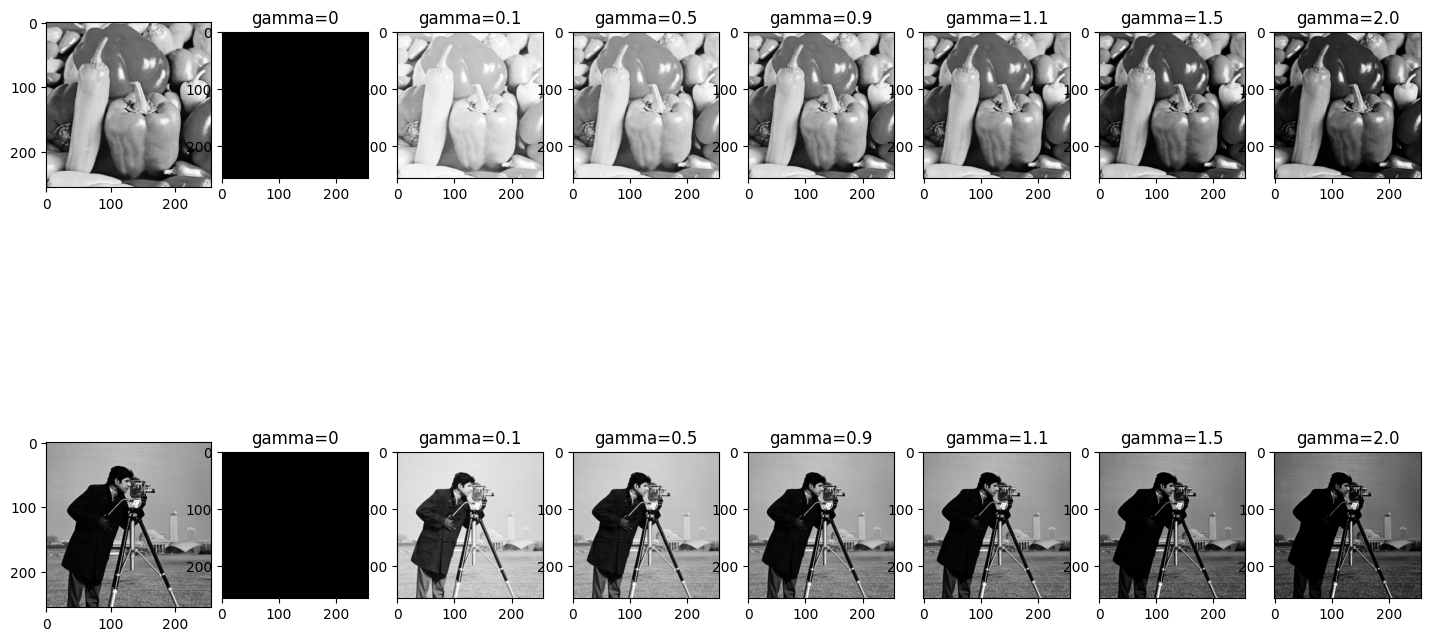

In [7]:
gammas = [0, 0.1, 0.5, 0.9, 1.1, 1.5, 2.0]
C = 1
plt.figure(figsize=(20, 10))

plt.subplot(2,8,1)
plt.imshow(image, cmap='gray')

plt.subplot(2,8,9)
plt.imshow(image2, cmap='gray')

for i, gamma in enumerate(gammas):
    transformed_image = np.clip(C * np.power(image / 255, gamma), 0, 255)
    plt.subplot(2,9,i+2)
    plt.title(f'gamma={gamma}')
    plt.imshow(transformed_image, cmap='gray')

    transformed_image2 = np.clip(C * np.power(image2 / 255, gamma), 0, 255)
    plt.subplot(2,9,i+11)
    plt.title(f'gamma={gamma}')
    plt.imshow(transformed_image2, cmap='gray')

### b)  Negacja obrazu  
  
Zaimplementuj negację obrazu wykorzystując informację, że $y_{ij}= L - 1 - f_{ij}$, gdzie $L=2^k$, a $k$ jest ilością bitów w obrazie.  
  
Wskazówka: Obraz monochromatyczny jest obrazem 8-bitowym, zatem w tym przypadku $L=255$

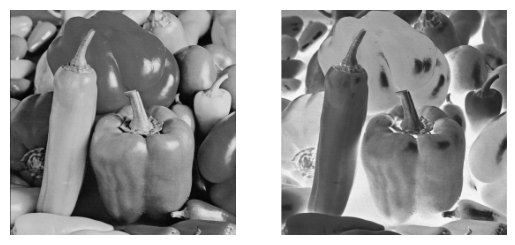

In [8]:
neg_image = 255 - 1 - image

plt.subplot(1, 2, 1)
plt.axis('off')
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.axis('off')
plt.imshow(cv.cvtColor(neg_image, cv.COLOR_BGR2RGB))

## Wnioski  
  
Na podstawie przeporwadzonych eksperymentów opisz jakie zaobserwowałaś/eś różnice między poszczególnymi obrazami dla wykonywanych operacji obrazowych. 

### Zadanie 2
a) Obraz znormalizowany poprzez obcięcie wartości powyżej 255 jest bardziej prześwietlony, szczególnie w jasnych obszarach, natomiast obraz znormalizowany poprzez średnią jest bardziej naturalny i zachowuje więcej szczegółów, dzięki czemu lepiej oddaje oryginalną treść obu obrazów.  

b) Obraz znormalizowany poprzez obcięcie wartości poniżej 0 ma bardziej dramatyczny kontrast z ciemniejszymi partiami, ponieważ ujemne wartości pikseli zostały obcięte do zera. Z kolei znormalizowany poprzez wartość absolutną obraz jest jaśniejszy, a przejścia tonalne są łagodniejsze, co pozwala na zachowanie większej ilości szczegółów.  

c) Lewy obraz (maksimum) jest jaśniejszy i zachowuje więcej jasnych szczegółów, przez co wygląda na bardziej rozświetlony i przejrzysty. Z kolei prawy obraz (minimum) jest ciemniejszy, z większym uwydatnieniem cieni i ciemnych detali. W efekcie, lewy obraz lepiej przedstawia jasne fragmenty obu obrazów, natomiast prawy koncentruje się na ciemnych partiach.

d) Operacja OR łączy jasność obu obrazów, czego efektem jest jaśniejszy obraz pozwalający zobaczyć większą ilość elementów. Operacja XOR uwypukla różnice pomiędzy obrazami. Operacja AND pokazuje wspólne elementy obu obrazów.

### Zadanie 3
a) Transformacja potęgowa z użyciem parametru gamma wpływa na jasność i kontrast obrazu poprzez nieliniową modyfikację wartości pikseli.
* Dla $\gamma=0$ obraz staje się całkowicie czarny.
* Dla $\gamma<1$ wartości pikseli w ciemniejszych obrazach są podnoszone, dzięki czemu więcej szczegółów staje się widocznych w ciemnych obszarach.
* Dla $\gamma>1$ obrazy stają się ciemniejsze, co uwydatnia szczegóły w jaśniejszych obszarach.